In [127]:
description = """
09/24/2018

Over the past weekend Stefan and Sheila turned down the CO2 laser which made some higher order modes disappear 
from the antisymmetric port.  These higher order modes showed up with a particular CO2 power which made it resonate,
what is odd is that the occurence happened when bringing the arms into resonance from the CARM reduction.

The goal of this code is to use Finesse to map out the HOM resonances in the power recycling cavity and then see
how the thermal lens varies the round trip gouy phase.
"""

import mpl_toolkits.mplot3d.axes3d as p3

In [120]:
kat_code = """
%%% FTblock laser
###########################################################################
# Laser and input optics
l L0 125 0.0 0.0 ni
bs jitter 1 0 0 0 ni nLaserOut dump dump

tem L0 0 0 1.0 0.0 
#tem L0 0 1 0.0 0.0
#tem L0 1 0 0.0 0.0

#s lmod1 1 n0 n1

# modulators for core interferometer sensing - Advanced LIGO, CQG, 2015 
# http://iopscience.iop.org/article/10.1088/0264-9381/32/7/074001/meta#cqg507871s4-8
# 9MHz (CARM, PRC, SRC loops)
#const f1 9099471
#const f2 45497355

#mod mod1 $f1 0.18 1 pm n1 n2
#s lmod2 1 n2 n3

# 45MHz (MICH, SRC loops)
#mod mod2 $f2 0.18 1 pm n3 nLaserOut
###########################################################################
%%% FTend laser

%%% FTblock IMC
#####################################################################################
s sPRCin 0.4135 nLaserOut nPRM1

# PRM
# AR surface
m2 PRMAR 0 40u 0 nPRM1 nPRMs1
# Substrate
s sPRMsub1 0.0737 $nsilica nPRMs1 nPRMs2
# HR surface
m1 PRM 0.003 8.5u $phi_PRM nPRMs2 nPRM2
attr PRM Rc -10.973
# Distance between PRM and PR2
s lp1 16.6128 nPRM2 nPR2a
# PR2
bs1 PR2 250u $Mloss 0 -0.79 nPR2a nPR2b nPOP nAPOP
attr PR2 Rc -4.543 
# Distance from PR2 to PR3
s lp2 16.1626 nPR2b nPR3a
# PR3
bs1 PR3 0 $Mloss 0 0.615 nPR3a nPR3b dump dump
attr PR3 Rc 36.006
# Distance from PR3
s lp3 19.5381 nPR3b nPRBS

###########################################################################
%%% FTend PRC

%%% FTblock BS
###########################################################################
# BS beamsplitter
##------------------------------------------------------------ 
## BS 
##                             ^ 
##                  to IMY     |      
##                             |      ,'-.
##                             |     +    `. 
##                        nYBS |   ,'       :'
##      nPR3b                  |  +i1      +
##         ---------------->    ,:._  i2 ,'
##    from the PRC       nPRBS + \  `-. + nXBS
##                           ,' i3\   ,' --------------->
##                          +      \ +     to IMX
##                        ,'     i4.'
##                       `._      ..
##                          `._ ,' |nSRBS
##                             -   |
##                                 |to the SRC
##                                 |
##                                 v
##------------------------------------------------------------
bs1 BS 0.5 $Mloss $phi_BS 45 nPRBS nYBS nBSi1 nBSi3
s BSsub1 0.0687 $nsilica nBSi1 nBSi2
s BSsub2 0.0687 $nsilica nBSi3 nBSi4
bs2 BSAR1 50u 0 0 -29.195 nBSi2 dump14 nXBS nPOX
bs2 BSAR2 50u 0 0 29.195 nBSi4 dump15 nSRBS dump16

###########################################################################
%%% FTend BS

%%% FTblock Yarm
###########################################################################
# Distance from beam splitter to Y arm input mirror
s ly1 4.862 nYBS nITMY1a

# Thermal lens correction
lens ITMY_therm $TLY_f nITMY1a nITM_th1
s ITMY_th1 0 nITM_th1 nITM_th2
lens ITMY_lens $SLY_f nITM_th2 nITM_th3
s ITMY_th2 0 nITM_th3 nITMY1

# Y arm input mirror
m2 ITMYAR 0 20u 0 nITMY1 nITMYs1
s ITMYsub 0.2 $nsilica nITMYs1 nITMYs2
m1 ITMY 0.014 $Mloss $phi_ITMY nITMYs2 nITMY2
attr ITMY Rc -1934

# Y arm length
s LY $Larm nITMY2 nETMY1

# Y arm end mirror
m1 ETMY 5u $Mloss $phi_ETMY nETMY1 nETMYs1
s ETMYsub 0.2 $nsilica nETMYs1 nETMYs2
m2 ETMYAR 0 500u 0 nETMYs2 nPTY
attr ETMY Rc 2245
attr ETMY mass 40
attr ITMY mass 40

###########################################################################
%%% FTend Yarm

%%% FTblock Xarm
###########################################################################

# Distance from beam splitter to X arm input mirror 
s lx1 4.993 nXBS nITMX1a

# Thermal lens correction
lens ITMX_therm $TLX_f nITMX1a nITMX_th1
s ITMX_th1 0 nITMX_th1 nITMX_th2
lens ITMX_lens $SLX_f nITMX_th2 nITMX_th3
s ITMX_th2 0 nITMX_th3 nITMX1

# X arm input mirror
m2 ITMXAR 0 20u 0 nITMX1 nITMXs1 
s ITMXsub 0.2 $nsilica nITMXs1 nITMXs2
m1 ITMX 0.014 $Mloss $phi_ITMX nITMXs2 nITMX2
attr ITMX Rc -1934

# X arm length
s LX $Larm nITMX2 nETMX1

# X arm end mirror
m1 ETMX 5u $Mloss $phi_ETMX nETMX1 nETMXs1
s ETMXsub 0.2 $nsilica nETMXs1 nETMXs2
m2 ETMXAR 0 500u 0 nETMXs2 nPTX 
attr ETMX Rc 2245
attr ETMX mass 40
attr ITMX mass 40

###########################################################################
%%% FTend Xarm

%%% FTblock SRC
###########################################################################
# Distance to SR3
s ls3 19.3661 nSRBS nSR3b
# SR3
bs1 SR3 0 $Mloss 0 0.785 nSR3b nSR3a dump dump
attr SR3 Rc 35.972841
# Distance from SR3 to SR2
s ls2 15.4435 nSR3a nSR2b
# SR2
bs1 SR2 0 $Mloss 0 -0.87 nSR2b nSR2a dump dump
attr SR2 Rc -6.406
# Distance from SR2 to SRM
s ls1 15.7586 nSR2a nSRM1
# Signal recycling mirror SRM-08
m1 SRM 0.20 8.7u $phi_SRM nSRM1 nSRMs1
s SRMsub 0.0749 $nsilica nSRMs1 nSRMs2
m2 SRMAR 0 50n 0 nSRMs2 nSRM2
#bs2 SRMAR 50n 0 0 0 nSRMs2 nSRMAR1 nSRM2 nSRMAR2
attr SRM Rc -5.6938

s sSRM_FI 0.7278 nSRM2 nFI2a

###########################################################################
%%% FTend SRC

%%% FTblock FI
###########################################################################

# (Loctions and angles based on the solid work file D1000342-v14 give ~5% 
# mismatch. Thus lom1, lom3omc have been adjusted to get ~99.7% overlap at the OMC)

# Distance SRM --> Faraday Isolator (FI)


# Directional beam splitter (ideal Faraday Isolator with 4 ports)
# ----------------------------------------------------------------
# Description of node connections, inputNode --> outputNode
# --
# nFI2a (SRM)    --> nFI2c (OMC)
# nFI2b (SQZ)    --> nFI2a (SRM)
# nFI2c (OMC)    --> nFI2d (Unused)
# nFI2d (Unused) --> nFI2b (SQZ)

dbs FI2 nFI2a nFI2b nFI2c nFI2d

# Distance FI2 --> OM1  
s sFI_OM1 2.9339 nFI2c nOM1a

# OM1
bs1 OM1 800u $Mloss 0 2.251 nOM1a nOM1b dump21 dump22 # T is set for high power; Loss is a guess
attr OM1 Rc 4.6

# Distance OM1 --> OM2
s sOM1_OM2 1.395 nOM1b nOM2a 

# OM2
bs1 OM2 10u $Mloss 0 4.399 nOM2a nOM2b nOM2c nOM2d  # T is a guess
attr OM2 Rc 1.7058

# Distance OM2 --> OM3

s sOM2_OM3 0.631 nOM2b nOM3a 
bs1 OM3 10u $Mloss 0 30.037 nOM3a nOM3b nOM3c nOM3d # T is a guess

# Distance OM3 --> OMC input coupler IC
s sOM3_OMC 0.2034 nOM3b nOMC_ICa # By design should be ~0.31

###########################################################################
%%% FTend FI

%%% FTblock OMC
###########################################################################
# OMC (as built parameters: D1300507-v1)

# Input Coupler IC (flat mirror)
bs1 OMC_IC 0.0076 10u 0 2.7609 nOMC_ICa nOMC_ICb nOMC_ICc nOMC_ICd

# Distance from IC to OC  
s lIC_OC 0.2815 1 nOMC_ICc nOMC_OCa

# Output Coupler OC (flat mirror)
bs1 OMC_OC 0.0075 10u 0 4.004 nOMC_OCa nOMC_OCb nAS nOMC_OCd

# Distance from OC to CM1
s lOC_CM1 0.2842 1 nOMC_OCb nOMC_CM1a

# Curved Mirror CM1
bs1 OMC_CM1 36u 10u 0 4.004 nOMC_CM1a nOMC_CM1b nOMC_CM1c nOMC_CM1d
attr OMC_CM1 Rc 2.57321

# Distance from CM1 to CM2 
s lCM1_CM2 0.2815 1 nOMC_CM1b nOMC_CM2a

# Curved Mirror CM2
bs1 OMC_CM2 35.9u 10u 0 4.004 nOMC_CM2a nOMC_CM2b nOMC_CM2c nOMC_CM2d
attr OMC_CM2 Rc 2.57369

# Distance from CM2 to IC
s lCM2_IC 0.2842 1 nOMC_CM2b nOMC_ICd

###########################################################################
%%% FTend OMC


%%% FTblock cavities
###########################################################################
#cav cavIMC MC2 nMC2in MC2 nMC2refl 
#cav cavXARM ITMX nITMX2 ETMX nETMX1
#cav cavYARM ITMY nITMY2 ETMY nETMY1
#cav cavSRX SRM nSRM1 ITMX nITMXs2
#cav cavSRY SRM nSRM1 ITMY nITMYs2
cav cavPRX PRM nPRM2 ITMX nITMXs2
cav cavPRY PRM nPRM2 ITMY nITMYs2
#cav cavOMC OMC_IC nOMC_ICc OMC_IC nOMC_ICd

###########################################################################
%%% FTend cavities

%%% FTblock constants
###########################################################################
const nsilica 1.44963098985906
const nTGG 1.954
const nCalcite 1.65846
const Mloss 37.5u
const Larm 3994.4692
const fM 36.397884M
const fP 54.596826M
const TLY_f 34.5k         # Thermal lens ITMY
const TLX_f -4312.39         # Thermal lens ITMX
const SLY_f inf           # Substrate lens ITMY
const SLX_f inf           # Substrate lens ITMX
const th_f 34.5k
###########################################################################
%%% FTend constants

%%% FTblock tunings
###########################################################################
const phi_SRM 90.0
const phi_PRM 90.0
const phi_ITMX 0.0
const phi_ITMY 0.0
const phi_ETMX 0.0
const phi_ETMY 0.0
const phi_BS 0
###########################################################################
%%% FTend tunings


"""

In [121]:
import pykat
import numpy as np
import matplotlib.pyplot as pl

%matplotlib inline

In [122]:
#Load ALIGO design
basekat = pykat.finesse.kat() 
basekat.parse(kat_code)
#basekat.parse('xaxis PRM phi lin 0 360 1000 ')
basekat.parse('xaxis L0 f lin -4M 4M 2001')
basekat.parse('yaxis re:im')

Parsing `tem L0 0 0 1.0 0.0` into pykat object not implemented yet, added as extra line.


In [123]:
#Turn off all cavity commands so I don't get confused
for cav in basekat.getAll(pykat.commands.cavity):
    cav.enabled = False

In [124]:
kat_PRCx = basekat.deepcopy()

kat_PRCx.cavPRX.enabled=True
kat_PRCx.cavPRY.enabled=False

#kat_PRCx.ETMX.T.value = 1.0
#kat_PRCx.ETMX.R.value = 0.0
#kat_PRCx.ETMX.L.value = 0.0

#kat_PRCx.ETMY.T.value = 1.0
#kat_PRCx.ETMY.R.value = 0.0
#kat_PRCx.ETMY.L.value = 0.0

#kat_PRCx..PRMHR.T.value = 1.0
#kat_PRCx..PRMHR.R.value = 0.0
#kat_PRCx..PRMHR.L.value = 0.0

#kat_PRCx.SRM.T.value = 1.0
#kat_PRCx.SRM.R.value = 0.0
#kat_PRCx.SRM.L.value = 0.0


kat_PRCx.parse("bp prx_qx x q nPRM2")
kat_PRCx.parse("cp cavPRX x length")
kat_PRCx.parse("pd0 PRC_buildup nPRM2")
kat_PRCx.parse('cp cavPRX x finesse')

f = kat_PRCx.run()

--------------------------------------------------------------
Running kat - Started at 2018-09-26 15:53:37.091764


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.410945 seconds


In [125]:
q_prx = pykat.BeamParam(q=f['prx_qx'][0])

c = 3.0e8

print(q_prx.w*1000.0)

print((q_prx.gouy()*180./np.pi)/2.0)

print((f['cavPRX_x_length'][0]/2))

L = f['cavPRX_x_length'][0]

print((c/(L))*1e-6)

print(f['cavPRX_x_finesse'][0])

2.0015451440497127
13.827548158801289
(57.696015846975+0j)
(2.5998328965701796+0j)
(4.28638954269951+0j)


C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


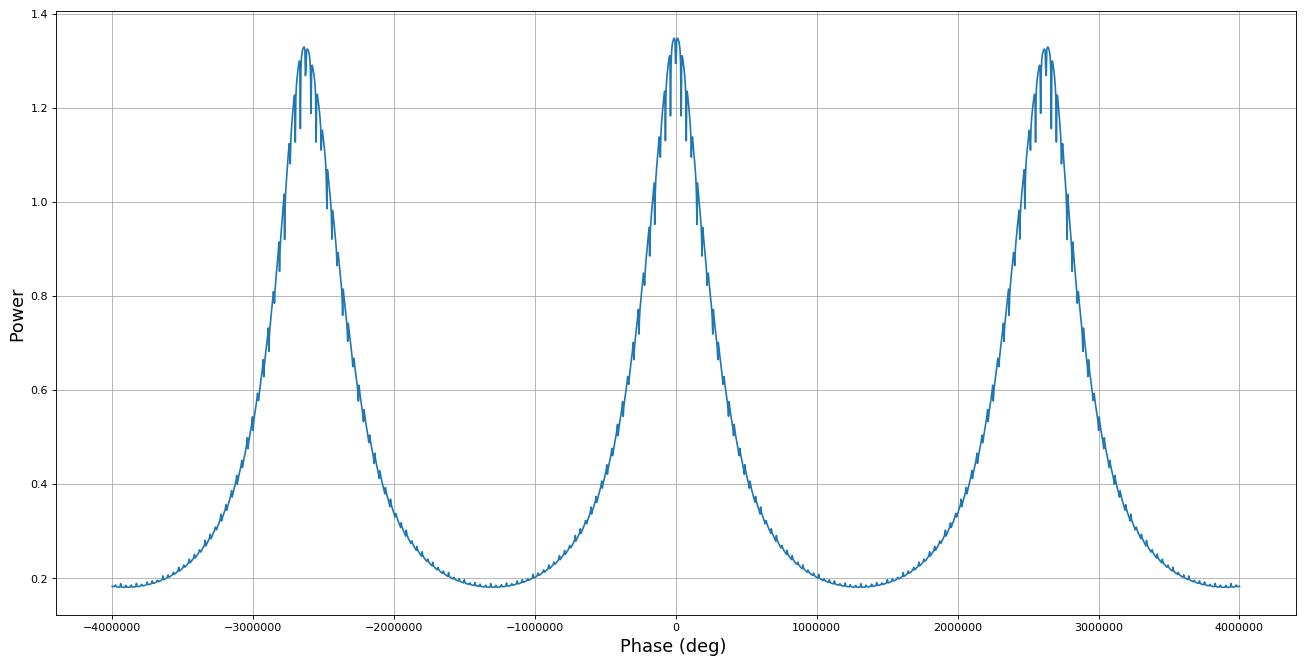

In [126]:
pl.figure(figsize=(20, 10), dpi=80)

############################
pl.subplot(111)

pl.plot(f.x,np.absolute(f['PRC_buildup']))

pl.ylabel("Power",fontsize=16)
pl.xlabel("Phase (deg) ",fontsize=16)
pl.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
pl.grid()
pl.legend()